In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

from pathlib import Path

In [44]:
filenames = ['X01_AGE_AND_SEX', 'X02_RACE', 'X03_HISPANIC_OR_LATINO_ORIGIN',
             'X07_MIGRATION', 'X08_COMMUTING', 'X09_CHILDREN_HOUSEHOLD_RELATIONSHIP',
             'X11_HOUSEHOLD_FAMILY_SUBFAMILIES', 'X12_MARITAL_STATUS_AND_HISTORY',
             'X14_SCHOOL_ENROLLMENT', 'X16_LANGUAGE_SPOKEN_AT_HOME', 'X19_INCOME', 'X20_EARNINGS',
             'X21_VETERAN_STATUS', 'X22_FOOD_STAMPS', 'X23_EMPLOYMENT_STATUS',
             'X27_HEALTH_INSURANCE', 'X99_IMPUTATION']

data_correlations_path = Path("../data/interim/correlations")

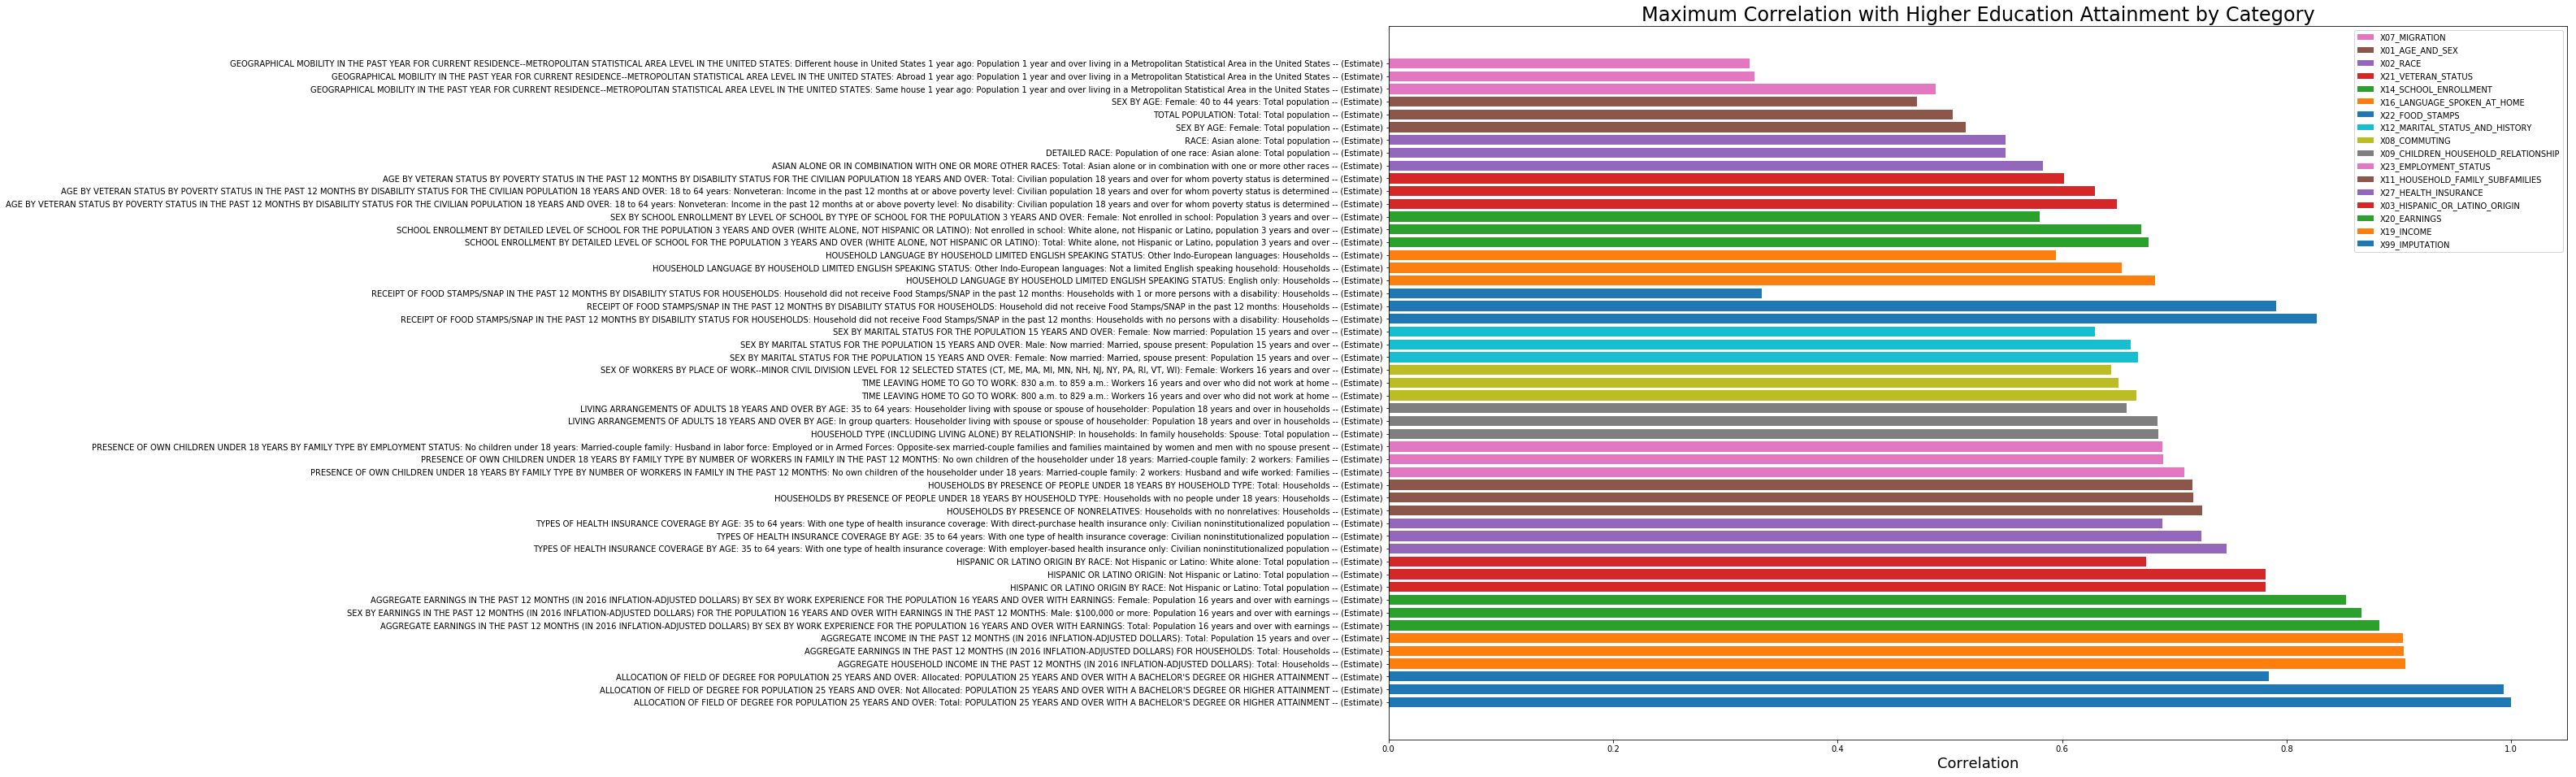

In [53]:
dfs = []

plots_per_df = 3

for name in filenames:
    df = pd.read_csv(data_correlations_path / "{}_correlation.csv".format(name))
    df['origin_file'] = name
    dfs.append(df)

top_correlations    = [] # The strongest positive correlations
min_correlations    = [] # The weakest correlations
bottom_correlations = [] # The strongest negative correlations

for df in dfs:
    # We are only interested in Estimates, not the Margin of Error.
    df = df[df['Unnamed: 0'].str.contains('Estimate')] 
    top_correlations.append(df[0:plots_per_df])
    bottom_correlations.append(df[-3:])
    min_correlations.append(df.sort_values('abs_correlation', ascending = False)[-3:])

# Chart labels
top_labels    = []
bottom_labels = []
min_labels    = []

# Chart graphs
top_values    = []
bottom_values = []
min_values    = []

# Origin File Names
top_files     = []
bottom_files  = []
min_files     = []

for df in top_correlations:
    top_labels.append(df['Unnamed: 0'].tolist())
    top_values.append(df['correlation'].tolist())
    top_files.append(df['origin_file'].tolist())

for df in bottom_correlations:
    bottom_labels.append(df['Unnamed: 0'].tolist())
    bottom_values.append(df['correlation'].tolist())
    bottom_files.append(df['origin_file'].tolist())

for df in min_correlations:
    min_labels.append(df['Unnamed: 0'].tolist())
    min_values.append(df['correlation'].tolist())
    min_files.append(df['origin_file'].tolist())

sorting_df = pd.DataFrame([top_values, top_labels, top_files], index=['top_values', 'top_labels', 'top_files']).transpose()

means = []

for i in range(len(sorting_df['top_values'])):
    means.append(np.mean(sorting_df['top_values'][i]))

sorting_df['average_value'] = means
sorted_top_values_df = sorting_df.sort_values('average_value', ascending = False)

bottom_sorting_df = pd.DataFrame([bottom_values, bottom_labels, bottom_files], index=['bottom_values', 'bottom_labels', 'bottom_files']).transpose()

bottom_means = []
for i in range(len(bottom_sorting_df['bottom_values'])):
    bottom_means.append(np.mean(bottom_sorting_df['bottom_values'][i]))

bottom_sorting_df['average_value'] = bottom_means
sorted_bottom_values_df = bottom_sorting_df.sort_values('average_value', ascending = False)

min_sorting_df = pd.DataFrame([min_values, min_labels, min_files], index=['min_values', 'min_labels', 'min_files']).transpose()

min_means = []
for i in range(len(min_sorting_df['min_values'])):
    abs_min_sorting_df = list(map(abs, min_sorting_df['min_values'][i]))
    min_means.append(np.mean(abs_min_sorting_df))

min_sorting_df['average_value'] = min_means

sorted_min_values_df = min_sorting_df.sort_values('average_value', ascending = False)

sorted_bottom_values = []
sorted_bottom_labels = []
sorted_bottom_files  = [] 
sorted_min_values    = []
sorted_min_labels    = []
sorted_min_files     = []
sorted_top_values    = []
sorted_top_labels    = []
sorted_top_files     = []

for values in sorted_top_values_df['top_values']:
    for value in values:
        sorted_top_values.append(value)

for values in sorted_bottom_values_df['bottom_values']:
    for value in values:
        sorted_bottom_values.append(value)

for values in sorted_min_values_df['min_values']:
    for value in values:
        sorted_min_values.append(value)
        
        
for files in sorted_top_values_df['top_files']:
    for file in files:
        sorted_top_files.append(file)

for files in sorted_bottom_values_df['bottom_files']:
    for file in files:
        sorted_bottom_files.append(file)

for files in sorted_min_values_df['min_files']:
    for file in files:
        sorted_min_files.append(file)
        
        

for labels in sorted_top_values_df['top_labels']:
    for label in labels:
        sorted_top_labels.append(label)

for labels in sorted_bottom_values_df['bottom_labels']:
    for label in labels:
        sorted_bottom_labels.append(label)

for labels in sorted_min_values_df['min_labels']:
    for label in labels:
        sorted_min_labels.append(label)

x = sp.linspace(0, 51, 51)
top_corr = plt.figure(figsize=(26, 26/1.61))
subplot_top_corr = top_corr.add_subplot(1, 1, 1)

for i in range(len(sorted_top_values))[0::3]:
    subplot_top_corr.barh(x[i:i+3], sorted_top_values[i:i+3], label = sorted_top_files[i])

handles, labels = subplot_top_corr.get_legend_handles_labels()
subplot_top_corr.legend(handles[::-1], labels[::-1])

plt.title("Maximum Correlation with Higher Education Attainment by Category", fontsize = 24)
plt.xlabel("Correlation", fontsize = 18)
plt.yticks(x, sorted_top_labels)
plt.show()

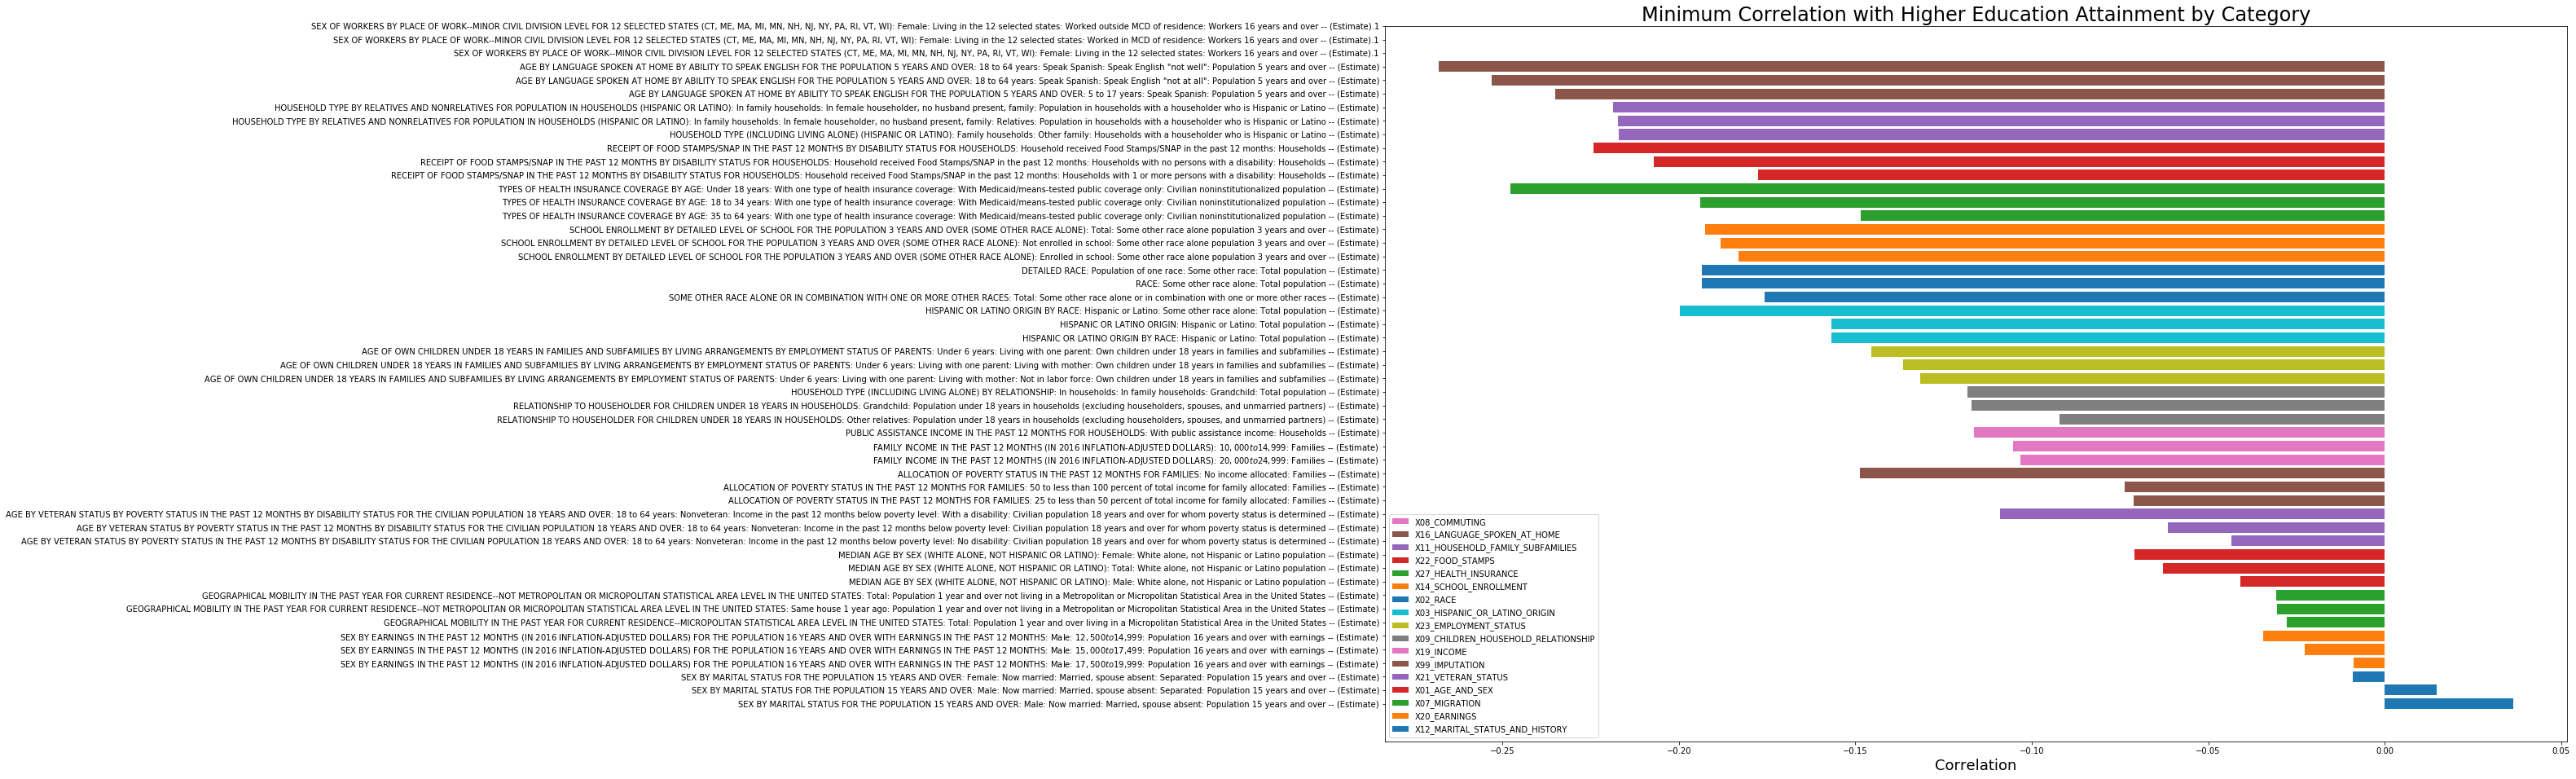

In [54]:
bottom_corr = plt.figure(figsize=(26, 26/1.61))
subplot_bottom_corr = bottom_corr.add_subplot(1, 1, 1)

for i in range(len(sorted_bottom_values))[0::3]:
    subplot_bottom_corr.barh(x[i:i+3], sorted_bottom_values[i:i+3], label = sorted_bottom_files[i])

handles, labels = subplot_bottom_corr.get_legend_handles_labels()
subplot_bottom_corr.legend(handles[::-1], labels[::-1])

plt.title("Minimum Correlation with Higher Education Attainment by Category", fontsize = 24)
plt.xlabel("Correlation", fontsize = 18)
plt.yticks(x, sorted_bottom_labels)
plt.show()

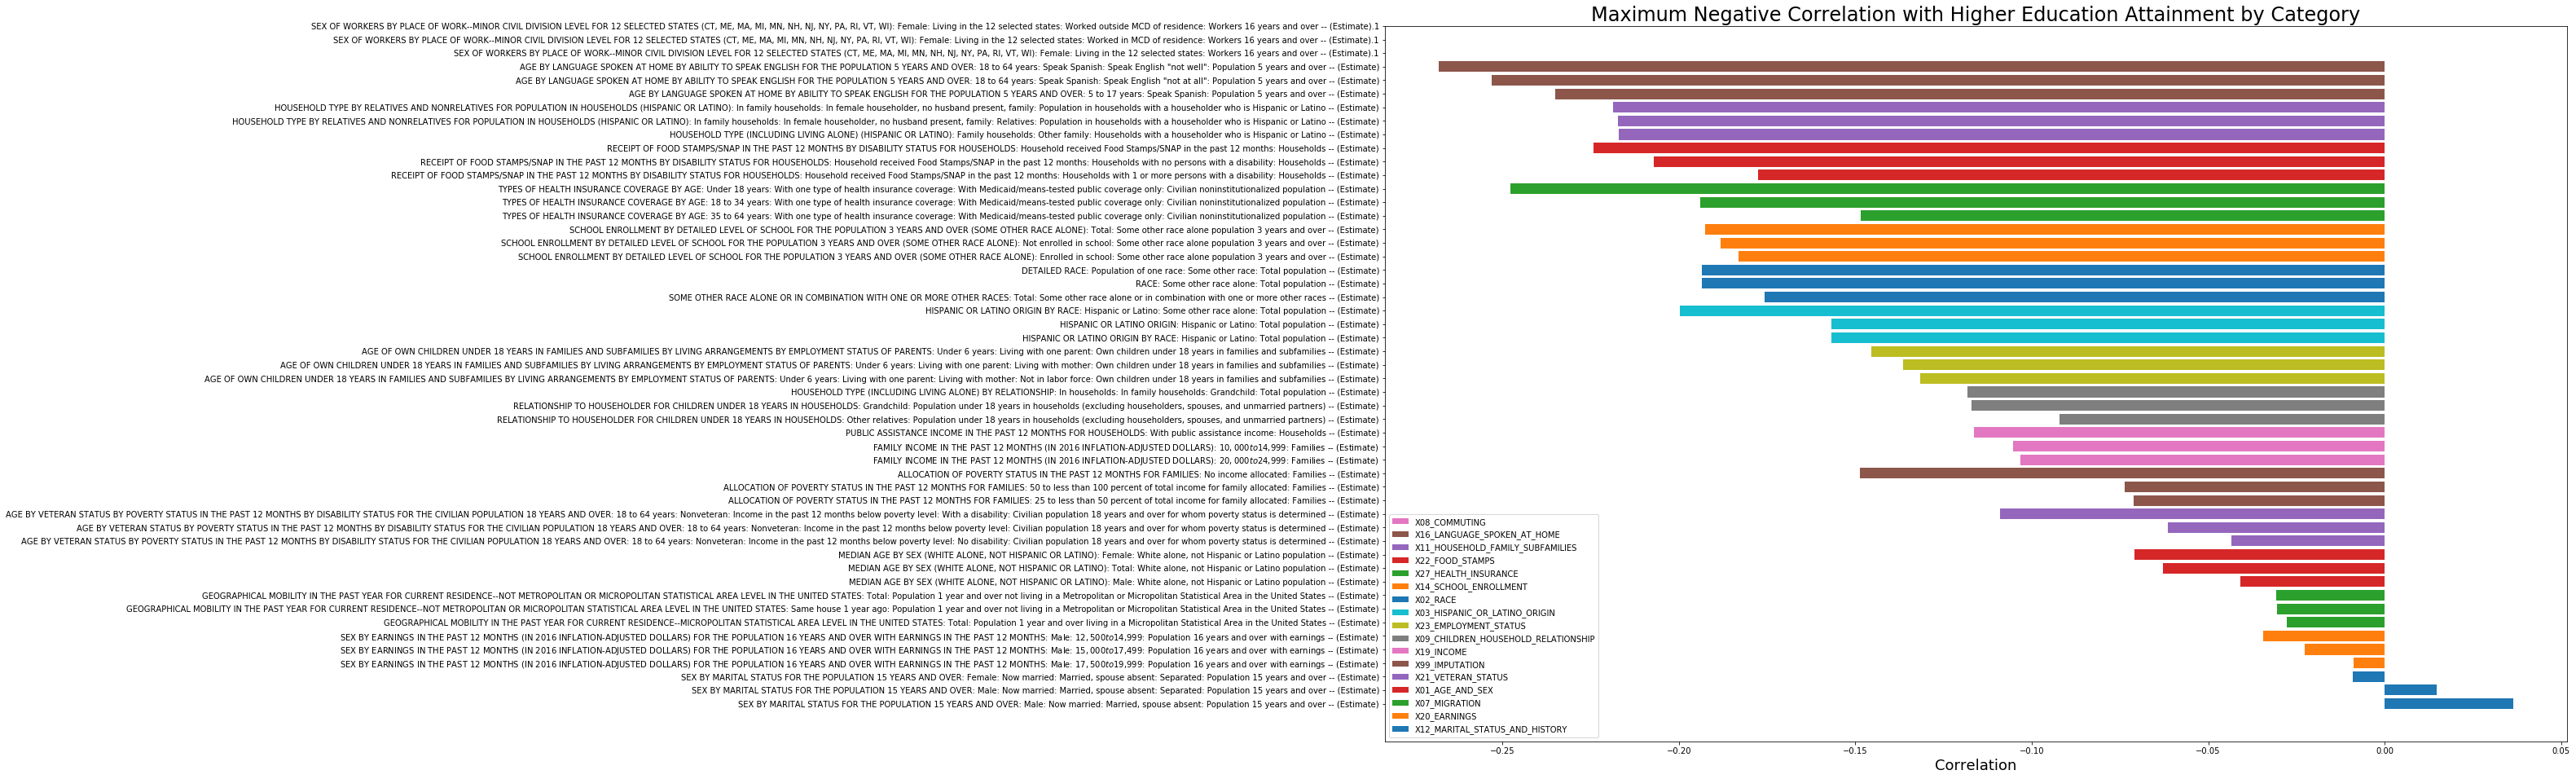

In [55]:
bottom_corr = plt.figure(figsize=(26, 26/1.61))
subplot_bottom_corr = bottom_corr.add_subplot(1, 1, 1)

for i in range(len(sorted_bottom_values))[0::3]:
    subplot_bottom_corr.barh(x[i:i+3], sorted_bottom_values[i:i+3], label = sorted_bottom_files[i])

handles, labels = subplot_bottom_corr.get_legend_handles_labels()
subplot_bottom_corr.legend(handles[::-1], labels[::-1])

plt.title("Maximum Negative Correlation with Higher Education Attainment by Category", fontsize = 24)
plt.xlabel("Correlation", fontsize = 18)
plt.yticks(x, sorted_bottom_labels)
plt.show()